In [1]:
# Principal Component Analysis
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1 : Load the iris dataset
iris = load_iris()
x = iris.data # This is a matrix with 150 rows and 4 columns(i.e features)
feature_names = iris.feature_names

# Step 2 : Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Step 3 : Apply PCA (Prinicipal Component Analysis)
# We tell PCA to keep enough components to preserve 95% of the variation
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(x_scaled)
# print(type(x_pca))

# Step 4 : Print Results
print("Original Number of Features:", x.shape[1])
print("Reduced Number of Features:", x_pca.shape[1])
# print(x_pca)

Original Number of Features: 4
Reduced Number of Features: 2


In [2]:
print("Explained Variance Ratio of each component :", pca.explained_variance_ratio_)
print("Total Explained Variance Ratio :", sum(pca.explained_variance_ratio_)) # Cumulative sum of each feature

Explained Variance Ratio of each component : [0.72962445 0.22850762]
Total Explained Variance Ratio : 0.9581320720000166


[ 72.96244541  95.8132072   99.48212909 100.        ]


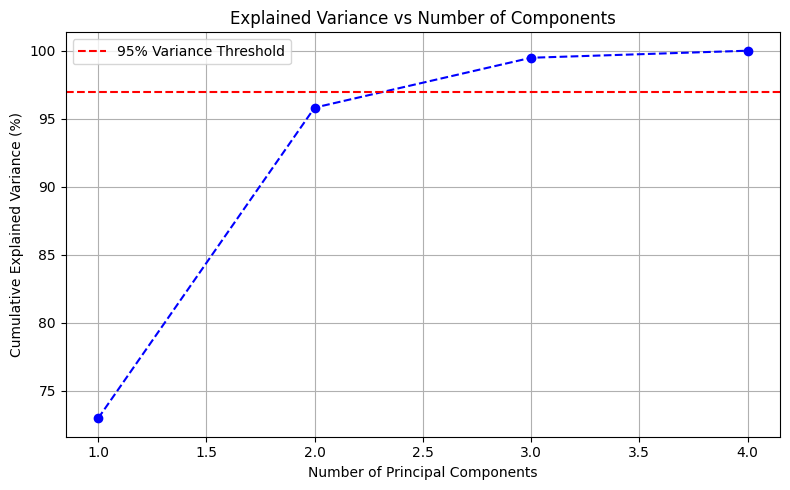

In [3]:
# Step 5 : Plot Cumulative explained variance
pca_full = PCA().fit(x_scaled)
cumsum = np.cumsum(pca_full.explained_variance_ratio_) * 100
print(cumsum)
components = np.arange(1,len(cumsum)+1)

plt.figure(figsize=(8, 5))
plt.plot(components, cumsum, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.axhline(y=97, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.tight_layout()
plt.show()